In [2]:
########################################################
# ConvertAcceleration_FitConstant
#
# This notebook converts acceleration data to velocity and
# acceleration data, and then plots the average of each
# as a fit to the data. Deviation plots are also given. 
#
#
########################################################
#### -------------- IMPORT BLOCK ------------------ ####
# In this section we import important Python packages. #
!pip install numpy 
!pip install matplotlib

import numpy as np # NumPy, a numerical Python package, is used for representing numerical data
import matplotlib.pyplot as plt # Matplotlib, a Python plotting package, is used for plotting data. 
import matplotlib

font = {'size'   : 12}

matplotlib.rc('font', **font)

  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9d/40/5ba7d4a3f80d39d409f21899972596bf62c8606f1406a825029649eaa439/matplotlib-2.2.5-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/da/d1/080d2bb13773803648281a49e3918f65b31b7beebf009887a529357fd44a/backports.functools_lru_cache-1.6.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/78/cb9248b2289ec31e301137cedbe4ca503a74ca87f88cdbfd2f8be52323bf/kiwisolver-1.1.0-cp27-cp27mu-ma

In [3]:
### -------(!!!) INPUT DATA (!!!) ----------- ###
### You may change these variables as needed. ###

# The input data section takes two forms: position or acceleration,
# depending on your experimental design. Your TA should have let you
# know which file to be using.

# YOUR_NAME:
#
# Your name. This will help distinguish your plots.
NAME = "Emily Tyhurst"

# ACCELERATION_FILENAME:
#
# The name of the file containing your acceleration-time data.
# 
# Your file should be a comma-separated value file
# with time in the first column and position in the second. 
#
# The units of position should be m/s^2. 
ACCELERATION_FILENAME="time-acceleration.csv"  

In [4]:
#### ------------- DATA LOAD BLOCK ------------------- ####
# In this section we import CSV files from your Practical #
# and load them into NumPy arrays.                        #

# Use NumPy to load the position data from the CSV file
acceleration_data = np.genfromtxt(ACCELERATION_FILENAME, delimiter=',', comments='#', skip_header=True)

# Separate the data into position and time 
time=  acceleration_data[:,0] # time in (s)
acceleration = acceleration_data[:,1] # acceleration in m/s^2

# Calculate the velocity based on position
velocity=np.zeros(np.shape(time))
for i in range(1, time.size):
    velocity[i]= velocity[i-1]+acceleration[i]*(time[i]-time[i-1])


OSError: time-acceleration.csv not found.

In [5]:
#### ------------- FITTING BLOCK ------------------- ####
# In this section we average the data to get a constant #
# fit to the data.                                      #

# Calculate the average velocity. 
avg_velocity = np.mean(velocity)
fit_velocity = np.ones(np.shape(velocity))*avg_velocity

# Calculate the spread in this average velocity. 
rmsd_velocity = np.sqrt(np.mean((velocity-fit_velocity)**2))

# Calculate the average acceleration.
avg_acceleration= np.mean(acceleration)
fit_acceleration = np.ones(np.shape(acceleration))*avg_acceleration

# Calculate the root mean square deviation 
rmsd_acceleration= np.sqrt(np.sqrt((acceleration-fit_acceleration)**2))

NameError: name 'velocity' is not defined

In [6]:
#### ---------- VELOCITY PLOTTING BLOCK ------------- ####
# In this section we plot the data from your experiment. #
# Here we are plotting force/mass next to acceleration.  #

plt.plot(time, velocity, 'b.', label="Velocity (m/s)")
plt.plot(time, fit_velocity, 'r-', label= "Average Velocity (m/s)")
plt.title(NAME+": Velocity Data")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Velocity_Data.png")
plt.show()
plt.clf()


NameError: name 'time' is not defined

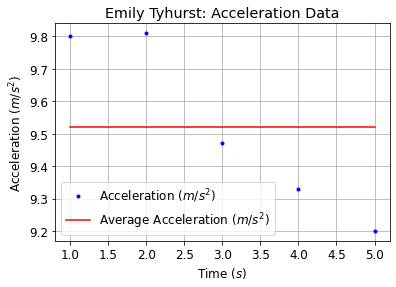

<Figure size 432x288 with 0 Axes>

In [ ]:
#### ---------- ACCELERATION PLOTTING BLOCK ------------- ####
# In this section we plot the data from your experiment. #
# Here we are plotting force/mass next to acceleration.  #

plt.plot(time, acceleration, 'b.', label="Acceleration $(m/s^2)$")
plt.plot(time, fit_acceleration, 'r-', label= "Average Acceleration $(m/s^2)$")
plt.title(NAME+": Acceleration Data")
plt.xlabel("Time $(s)$")
plt.ylabel("Acceleration $(m/s^2)$")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Acceleration_Data.png")
plt.show()
plt.clf()

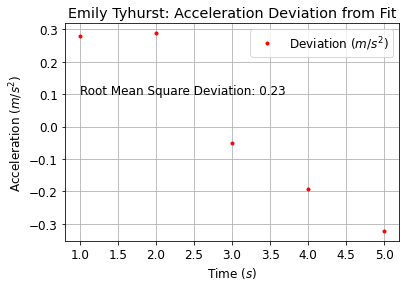

In [ ]:
#### ---------- ACCELERATION DEVIATION BLOCK ---------- ####
# In this section we compare the data from your experiment #
# to determine more precisely if the hypothesis is true.   #

plt.plot(time, acceleration - fit_acceleration, 'r.', label="Deviation $(m/s^2)$")
plt.text(1,0.1, "Root Mean Square Deviation: {:.2f}".format(rmsd_acceleration))
plt.title(NAME+": Acceleration Deviation from Fit")
plt.xlabel("Time $(s)$")
plt.ylabel("Acceleration $(m/s^2)$")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Acceleration_Deviation.png")
plt.show()


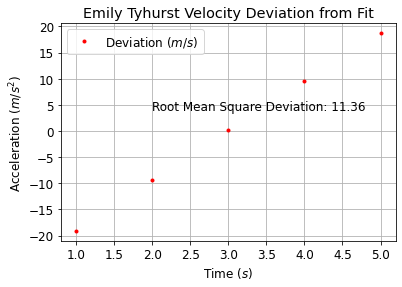

In [ ]:
#### ----------- VELOCITY DEVIATION BLOCK ------------- ####
# In this section we compare the data from your experiment #
# to determine more precisely if the hypothesis is true.   #

plt.plot(time, velocity - fit_velocity, 'r.', label="Deviation $(m/s)$")
plt.text(2,4, "Root Mean Square Deviation: {:.2f}".format(rmsd_velocity))
plt.title(NAME+" Velocity Deviation from Fit")
plt.xlabel("Time $(s)$")
plt.ylabel("Velocity $(m/s)$")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Velocity_Deviation.png")
plt.show()